# Linear Regression

1. Design model (input,output size, forward pass)
2. construct loss and optimizer
3. training loop
    - forward pass: compute prediction loss
    - backward pass: gradients
    - update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x_numpy.shape, y_numpy.shape

((100, 1), (100,))

In [4]:
# prepare data
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0],1)
y.shape

torch.Size([100, 1])

In [5]:
n_samples, n_features = x.shape

In [6]:
# 1) model
input_size = n_features
output_size = 1
# In nn.Linear(p1, p2); p1 is the number of units in the current layer whereas p2 is the number of units in next layer.
model = nn.Linear(input_size, output_size)

In [8]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch: 10, loss=501.5272
epoch: 20, loss=455.9152
epoch: 30, loss=422.6479
epoch: 40, loss=398.3738
epoch: 50, loss=380.6548
epoch: 60, loss=367.7159
epoch: 70, loss=358.2646
epoch: 80, loss=351.3589
epoch: 90, loss=346.3116
epoch: 100, loss=342.6219


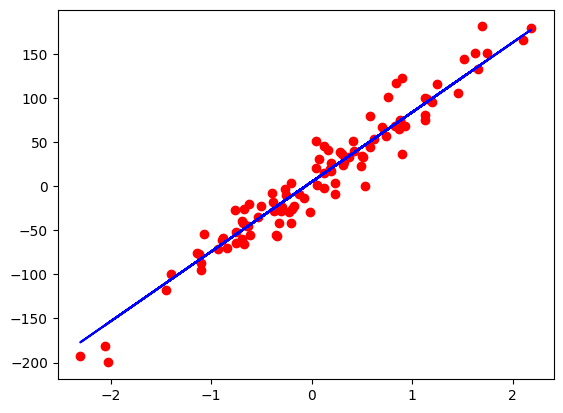

In [10]:
# 3) training loop
num_epochs = 100 #update weight 100 times to minimize loss function
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 ==0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')
        
#plot
#.detach() sets required_grad to false or detaches the grad and generate new tensor where our requires_grad = False
#.numpy() <-- convert torch to numpy
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted,'b')
plt.show()
